  0%|          | 0/1243 [00:00<?, ?it/s]

19133


100%|██████████| 1243/1243 [01:41<00:00, 12.23it/s]


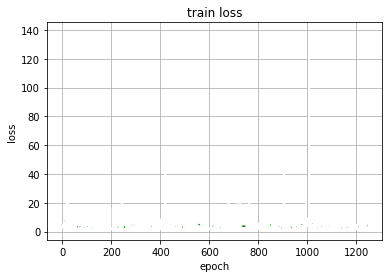

In [2]:

import numpy as np
import pandas as pd
from PIL import Image
import torch
from torch import optim, nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data.dataset import Dataset
from data_process.read_data import DatasetFromCSV
import torch
from torch.autograd import Variable
from torch.nn import Conv2d,Module,Sequential,ReLU,MaxPool2d,Linear,Dropout,Softmax,MSELoss
from torch.utils.data import DataLoader,TensorDataset
import os
import numpy as np
import struct
from tqdm import tqdm
from model.mdel import MyNet
import matplotlib.pyplot as plt
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 1
test_data = DatasetFromCSV(r'/home/mist/iGEM-CNN-Regression/data_process/test_file.csv', transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

net = MyNet()
net.load_state_dict(torch.load('model.pth'))
list_output = []
list_real = []
for data_X, data_tf, data_y in tqdm(test_loader):
    trainData, trainTF, trainLabel = Variable(data_X), Variable(data_tf), Variable(data_y)
    output = net(trainData.type(torch.FloatTensor), trainTF.cuda().type(torch.FloatTensor))
    list_output.append(output.data.cpu().numpy()[-1][0])
    list_real.append(data_y.data.cpu().numpy()[-1])

plt.title('train loss')
plt.plot(range(0,len(list_output)), list_output, color='green', label='predict')
plt.plot(range(0,len(list_real)), list_real, color='red', label='real')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()